# RSL versus Time plots

This script is written to analyze GIA runs for SE Asia from ANICE, ICE 5G and ICE6G models, with varying mantle viscosities.
To run this script, two types of data are needed. First, an excel file named "RSL_data_xlsx" containing two sheets. The first is named "COORD", and contains the coordinates of the locations where RSL data is available. The second is named RSL, and contains Relative Sea Level observations.

In [1]:
import pandas as pd
COORD=pd.read_excel('RSL_data.xlsx', sheet_name='COORD', header=0)
RSLdata=pd.read_excel('RSL_data.xlsx', sheet_name='RSL', header=0)
COORD

,Unnamed: 0,Longitude,Latitude
0,Tambakulu,119.059456,-4.744473
1,Suranti,119.139456,-4.644473
2,Kodingareng keke,119.279456,-5.104473
3,Bone Batang,119.319456,-5.024473
4,Sanrobengi,119.339456,-5.324473
5,Panambungan,119.359456,-4.944473


In [2]:
RSLdata

,Sample Name,Island Name,Mean age [cal a BP],Error (yr),RSL [m],Vertical error ± [m]
0,BB_FMA11,Bone Batang,4869.0,75.0,0.205459,0.286487
1,BB_FMA12,Bone Batang,5196.0,118.0,0.155459,0.286487
2,BB_FMA13,Bone Batang,3692.5,107.5,0.135459,0.286487
3,KK_FMA14,Kodingareng Keke,5342.5,87.5,0.008564,0.210519
4,KK_FMA15,Kodingareng Keke,5868.5,98.5,-0.001436,0.210519
5,KK_FMA16,Kodingareng Keke,5519.5,65.5,0.118564,0.210519
6,KK_FMA17,Kodingareng Keke,5519.5,65.5,0.038564,0.210519
7,SB_FMA18,Sanrobengi,4954.5,109.5,0.136250,0.211167
8,SB_FMA19,Sanrobengi,5956.5,83.5,0.216250,0.211167
9,SB_FMA20,Sanrobengi,5509.5,66.5,0.496250,0.284062


To extract data from the GIA models, the coordinates in the COORD spreadsheet are averaged. This is correct only if the different sites are spatially clustered. Alternatively, the option is given to insert free coordinates.

In [3]:
#Extract coordinates from excel table - WARNING! Use only for geographically clustered sites
#as this assumes that GIA does not change significantly between sites.
#loni=COORD['Longitude'].mean()
#lati=COORD['Latitude'].mean()

#Alternatively, comment out lines 18-20 and uncomment lines 23-24, inserting your own coordinates
loni = 119.489
lati = -5.586

The GIA models are contained into a folder called "All_GIA_models". Currently, this folder contains 54 different solutions, calculating GIA predictions using a suite of combinations of ice-sheets and solid Earth models. The Earth’s mantle is discretized in two layers: Upper and Lower Mantle (respectively, UL and LM). Each mantle viscosity profile is combined with a perfectly elastic lithosphere whose thickness is set to either 60, 90 or 120 km. Six mantle viscosities are used for each lithospheric thickness, as shown in the table below. We combine the Earth models with three different models: ICE5g, ICE6g (Peltier et al., 2015;Peltier, 2009) and ANICE (De Boer et al., 2015;De Boer et al., 2017). In total, we ran 54 different ice-earth model combinations (3 ice sheet models × 3 lithospheric thicknesses × 6 mantle viscosity profiles).

<br>
<center>Table 1: Upper and lower mantle viscosities for the different earth models</center>

| Model name | Upper Mantle [Pa s 10^21] | Lower Mantle [Pa s 10^21] |
|------------|--------------------------|--------------------------|
| VM1        | 0.25                     | 2.5                      |
| VM2        | 0.25                     | 5.0                      |
| VM3        | 0.25                     | 10                       |
| VM4        | 0.5                      | 2.5                      |
| VM5        | 0.5                      | 5                        |
| VM6        | 0.5                      | 10                       |


In [4]:
#import all the filenames in the "All_GIA_models" folder
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import netCDF4
from netCDF4 import Dataset
import os

#NOTE: all NC files should have the same geo extent
data = 'All_GIA_models/aniceselen-visco1-60km.nc'
nc = netCDF4.Dataset(data)
lat = nc.variables['Lat'][:]
lon = nc.variables['Lon'][:]
times = nc.variables['t']

# function to find index to nearest point
def near(array,value):
    idx=(np.abs(array-value)).argmin()
    return idx

# find nearest point to desired location
ix = near(lon, loni)
iy = near(lat, lati)
path = 'All_GIA_models'
folder = os.fsencode(path)
filenames = []
for file in os.listdir(folder):
    filename = os.fsdecode(file)
    if filename.endswith( ('.nc') ):
        filenames.append(filename)
filenames.sort()

**ANICE Ice model**. The following code extracts the ANICE model predictions for the selected coordinates. ANICE has a time step of 1ka. 

In [5]:
#NOTE modify this if time is longer than 17 time steps
GIA_extract = np.empty((0,17))

#Extract the ANICE GIA model results at the specified location
for i in range(0, 18):
    nc = filenames[i]
    NCFile = "All_GIA_models/"+nc
    nc = netCDF4.Dataset(NCFile)
    lat = nc.variables['Lat'][:]
    lon = nc.variables['Lon'][:]
    times = nc.variables['t']
    # get all time records of variable [vname] at indices [iy,ix]
    vname = 'RSL'
    var = nc.variables[vname]
    h = var[:,iy,ix]
    GIA_extract=np.append(GIA_extract, [h], axis=0)
AniceCol = filenames[0:18]
AniceGIA = pd.DataFrame(GIA_extract,index=AniceCol)
AniceGIA = pd.DataFrame.transpose(AniceGIA)
time_Anice=np.linspace(start = 0, stop = 16, num = 17)
AniceGIA.insert(0, "Time (ka)", time_Anice, allow_duplicates = False)
AniceGIA.columns = AniceGIA.columns.str.replace(".nc", "")
AniceGIA

,Time (ka),aniceselen-visco1-120km,aniceselen-visco1-60km,aniceselen-visco1-90km,aniceselen-visco2-120km,aniceselen-visco2-60km,aniceselen-visco2-90km,aniceselen-visco3-120km,aniceselen-visco3-60km,aniceselen-visco3-90km,aniceselen-visco4-120km,aniceselen-visco4-60km,aniceselen-visco4-90km,aniceselen-visco5-120km,aniceselen-visco5-60km,aniceselen-visco5-90km,aniceselen-visco6-120km,aniceselen-visco6-60km,aniceselen-visco6-90km
0,0.0,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000
1,1.0,0.26334,0.18916,0.27236,0.30831,0.25430,0.31295,0.37191,0.31624,0.36665,0.26677,0.24434,0.26138,0.31272,0.28943,0.30132,0.37980,0.35593,0.39059
2,2.0,0.45072,0.34463,0.42561,0.50885,0.36007,0.48448,0.70505,0.53927,0.65558,0.46462,0.37304,0.44505,0.56649,0.48084,0.55759,0.67617,0.67089,0.68238
3,3.0,0.44362,0.24071,0.38650,0.57120,0.30692,0.53962,0.82671,0.58060,0.75953,0.47648,0.34598,0.46359,0.60419,0.52121,0.58479,0.79578,0.76704,0.79936
4,4.0,0.36110,0.07632,0.27488,0.50969,0.15613,0.42385,0.83639,0.47251,0.75704,0.37160,0.15967,0.32912,0.56292,0.45109,0.56839,0.84914,0.82115,0.86563
5,5.0,0.27021,-0.10570,0.12456,0.53056,0.03659,0.38625,1.01496,0.49032,0.87700,0.34450,0.17662,0.35539,0.67473,0.54013,0.64608,0.98147,0.97348,0.97598
6,6.0,0.44153,-0.04768,0.24242,0.87387,0.25035,0.71588,1.35979,0.81457,1.19642,0.64325,0.39125,0.57696,0.99729,0.86729,0.97488,1.27605,1.40290,1.32341
7,7.0,0.53213,-0.10371,0.29935,1.01421,0.38987,0.79058,1.46905,0.98325,1.30301,0.74192,0.63533,0.71140,1.16602,1.12049,1.17749,1.43960,1.64822,1.53982
8,8.0,0.39194,-0.19746,0.18145,0.98857,0.34285,0.76455,1.39396,0.98360,1.24658,0.69435,0.53400,0.66848,1.11983,1.14820,1.16228,1.36800,1.62785,1.47194
9,9.0,-1.22986,-1.73700,-1.36386,-0.60680,-1.02356,-0.72685,-0.29451,-0.42519,-0.28695,-0.97161,-1.13855,-1.00141,-0.61751,-0.55301,-0.58608,-0.38149,-0.06980,-0.29476


**ICE5g Ice model**. The following code extracts the ICE5g model predictions for the selected coordinates. ICE5g has a time step of 0.5ka. 

In [6]:
#modify this if time is longer than 33 time steps
GIA_extract = np.empty((0,33))

#Extract the ICE5G GIA model results at the specified location
for i in range(18, 36):
    nc = filenames[i]
    NCFile = "All_GIA_models/"+nc
    nc = netCDF4.Dataset(NCFile)
    lat = nc.variables['Lat'][:]
    lon = nc.variables['Lon'][:]
    times = nc.variables['t']
    # get all time records of variable [vname] at indices [iy,ix]
    vname = 'RSL'
    var = nc.variables[vname]
    h = var[:,iy,ix]
    GIA_extract=np.append(GIA_extract, [h], axis=0)
Ice5GCol=filenames[18:36]
Ice5GGIA = pd.DataFrame(GIA_extract,index=Ice5GCol)
Ice5GGIA = pd.DataFrame.transpose(Ice5GGIA)
time_ICE5G=np.linspace(start = 0, stop = 16, num = 33)
Ice5GGIA.insert(0, "Time (ka)", time_ICE5G, allow_duplicates = False)
Ice5GGIA.columns = Ice5GGIA.columns.str.replace(".nc", "")
Ice5GGIA

,Time (ka),ice5g-visco1-120km,ice5g-visco1-60km,ice5g-visco1-90km,ice5g-visco2-120km,ice5g-visco2-60km,ice5g-visco2-90km,ice5g-visco3-120km,ice5g-visco3-60km,ice5g-visco3-90km,ice5g-visco4-120km,ice5g-visco4-60km,ice5g-visco4-90km,ice5g-visco5-120km,ice5g-visco5-60km,ice5g-visco5-90km,ice5g-visco6-120km,ice5g-visco6-60km,ice5g-visco6-90km
0,0.0,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000
1,0.5,0.16494,0.12646,0.15035,0.21873,0.17312,0.20565,0.27584,0.19753,0.24090,0.14794,0.11280,0.13181,0.20565,0.16422,0.19151,0.23714,0.22227,0.23454
2,1.0,0.28966,0.21389,0.26823,0.38599,0.25639,0.33347,0.49216,0.33078,0.44414,0.27667,0.23842,0.27714,0.39012,0.34655,0.37550,0.44197,0.44419,0.44417
3,1.5,0.46551,0.33352,0.42084,0.63706,0.39119,0.55764,0.74949,0.55046,0.68091,0.48988,0.43501,0.47380,0.62448,0.58489,0.60154,0.70677,0.68696,0.68693
4,2.0,0.65264,0.50232,0.59695,0.83417,0.53555,0.75142,1.00338,0.72689,0.88560,0.71262,0.61691,0.66956,0.83693,0.79976,0.82852,0.94481,0.92666,0.93087
5,2.5,0.78082,0.55129,0.71780,1.00272,0.64889,0.86528,1.18083,0.85826,1.08014,0.84191,0.77587,0.80924,0.96889,0.89963,0.94023,1.09629,1.10518,1.07588
6,3.0,0.90160,0.65924,0.82914,1.13169,0.78173,1.01668,1.37254,1.06604,1.23696,0.97501,0.89524,0.94142,1.13291,1.04612,1.07257,1.28736,1.25648,1.25785
7,3.5,1.02229,0.73146,0.89835,1.25934,0.89340,1.11638,1.49682,1.22420,1.38936,1.04800,0.93195,1.00021,1.22578,1.14619,1.18367,1.42634,1.43511,1.39889
8,4.0,1.12820,0.84046,0.98634,1.34449,1.04187,1.23347,1.67247,1.39110,1.56546,1.12277,1.04625,1.06785,1.33006,1.27847,1.31623,1.57127,1.59547,1.53526
9,4.5,1.28229,1.04357,1.14916,1.52861,1.21016,1.41722,1.93652,1.63206,1.77636,1.27938,1.17803,1.23945,1.51487,1.45270,1.45408,1.74131,1.82891,1.75871


**ICE6g Ice model**. The following code extracts the ICE5g model predictions for the selected coordinates. ICE6g has a time step of 0.5ka. 

In [7]:
#modify this if time is longer than 33 time steps
GIA_extract = np.empty((0,33))

#Extract the ICE6G GIA model results at the specified location
for i in range(36, 54):
    nc = filenames[i]
    NCFile = "All_GIA_models/"+nc
    nc = netCDF4.Dataset(NCFile)
    lat = nc.variables['Lat'][:]
    lon = nc.variables['Lon'][:]
    times = nc.variables['t']
    # get all time records of variable [vname] at indices [iy,ix]
    vname = 'RSL'
    var = nc.variables[vname]
    h = var[:,iy,ix]
    GIA_extract=np.append(GIA_extract, [h], axis=0)
Ice6GCol=filenames[36:54]
Ice6GGIA = pd.DataFrame(GIA_extract,index=Ice6GCol)
Ice6GGIA = pd.DataFrame.transpose(Ice6GGIA)
time_ICE6G=np.linspace(start = 0, stop = 16, num = 33)
Ice6GGIA.insert(0, "Time (ka)", time_ICE6G, allow_duplicates = False)
Ice6GGIA.columns = Ice6GGIA.columns.str.replace(".nc", "")
Ice6GGIA

,Time (ka),ice6g-visco1-120km,ice6g-visco1-60km,ice6g-visco1-90km,ice6g-visco2-120km,ice6g-visco2-60km,ice6g-visco2-90km,ice6g-visco3-120km,ice6g-visco3-60km,ice6g-visco3-90km,ice6g-visco4-120km,ice6g-visco4-60km,ice6g-visco4-90km,ice6g-visco5-120km,ice6g-visco5-60km,ice6g-visco5-90km,ice6g-visco6-120km,ice6g-visco6-60km,ice6g-visco6-90km
0,0.0,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000
1,0.5,0.16036,0.12843,0.14347,0.22066,0.17249,0.21799,0.27579,0.22757,0.26715,0.16247,0.15319,0.15845,0.21292,0.17630,0.18881,0.24690,0.23388,0.24551
2,1.0,0.31047,0.24678,0.28638,0.37426,0.26061,0.32775,0.48359,0.33960,0.43306,0.30638,0.26607,0.31241,0.39367,0.32663,0.35436,0.44289,0.40538,0.42580
3,1.5,0.40128,0.30271,0.38186,0.53106,0.37826,0.50519,0.67328,0.47641,0.61269,0.42837,0.35336,0.40726,0.52592,0.47492,0.51041,0.60056,0.56822,0.57208
4,2.0,0.55283,0.41234,0.50827,0.65842,0.43089,0.60059,0.80821,0.59575,0.74553,0.56468,0.44041,0.52574,0.66137,0.57402,0.61547,0.74364,0.69655,0.72750
5,2.5,0.67343,0.49207,0.61267,0.79923,0.51014,0.69082,1.01830,0.67261,0.90900,0.67442,0.54687,0.63676,0.77524,0.64534,0.71285,0.88425,0.80506,0.84137
6,3.0,0.79744,0.55872,0.72750,0.93778,0.55247,0.81116,1.16158,0.80013,1.05483,0.79546,0.64694,0.72533,0.87912,0.71481,0.78589,1.04299,0.96573,0.98568
7,3.5,0.97480,0.64955,0.85680,1.10234,0.67782,0.97012,1.35551,0.94718,1.22263,0.93499,0.74083,0.85530,1.04720,0.84414,0.94143,1.23848,1.14774,1.17947
8,4.0,1.04472,0.65965,0.87658,1.19845,0.69634,1.04983,1.48426,1.06578,1.32846,0.96080,0.76058,0.85794,1.09893,0.98377,1.02493,1.32634,1.29687,1.29273
9,4.5,1.12621,0.71016,0.96652,1.35284,0.87616,1.18012,1.65499,1.24021,1.50954,1.11117,0.88661,0.97935,1.28546,1.13062,1.21272,1.54622,1.49570,1.50725


## Plots of GIA models and data
Select below one of the models to highlight throughout the rest of the analysis. The list of models reflect those contained in the folder "All_GIA_models".

In [8]:
import ipywidgets as widgets

#Select which model you want to map
Dropdown=widgets.Dropdown(
    options=filenames,
    #value='a',
    description='GIA model:',
    disabled=False,
)
display(Dropdown)

Dropdown(description='GIA model:', options=('aniceselen-visco1-120km.nc', 'aniceselen-visco1-60km.nc', 'anices…

The selected model will be highlighted in the plots below. To save an external file for each figure, uncomment the last line of the code below. 

**Note**: If you want to change the model highlighted in the graphs below (=thicker black line), change the model name in the dropdown menu above and rerun the cell below.

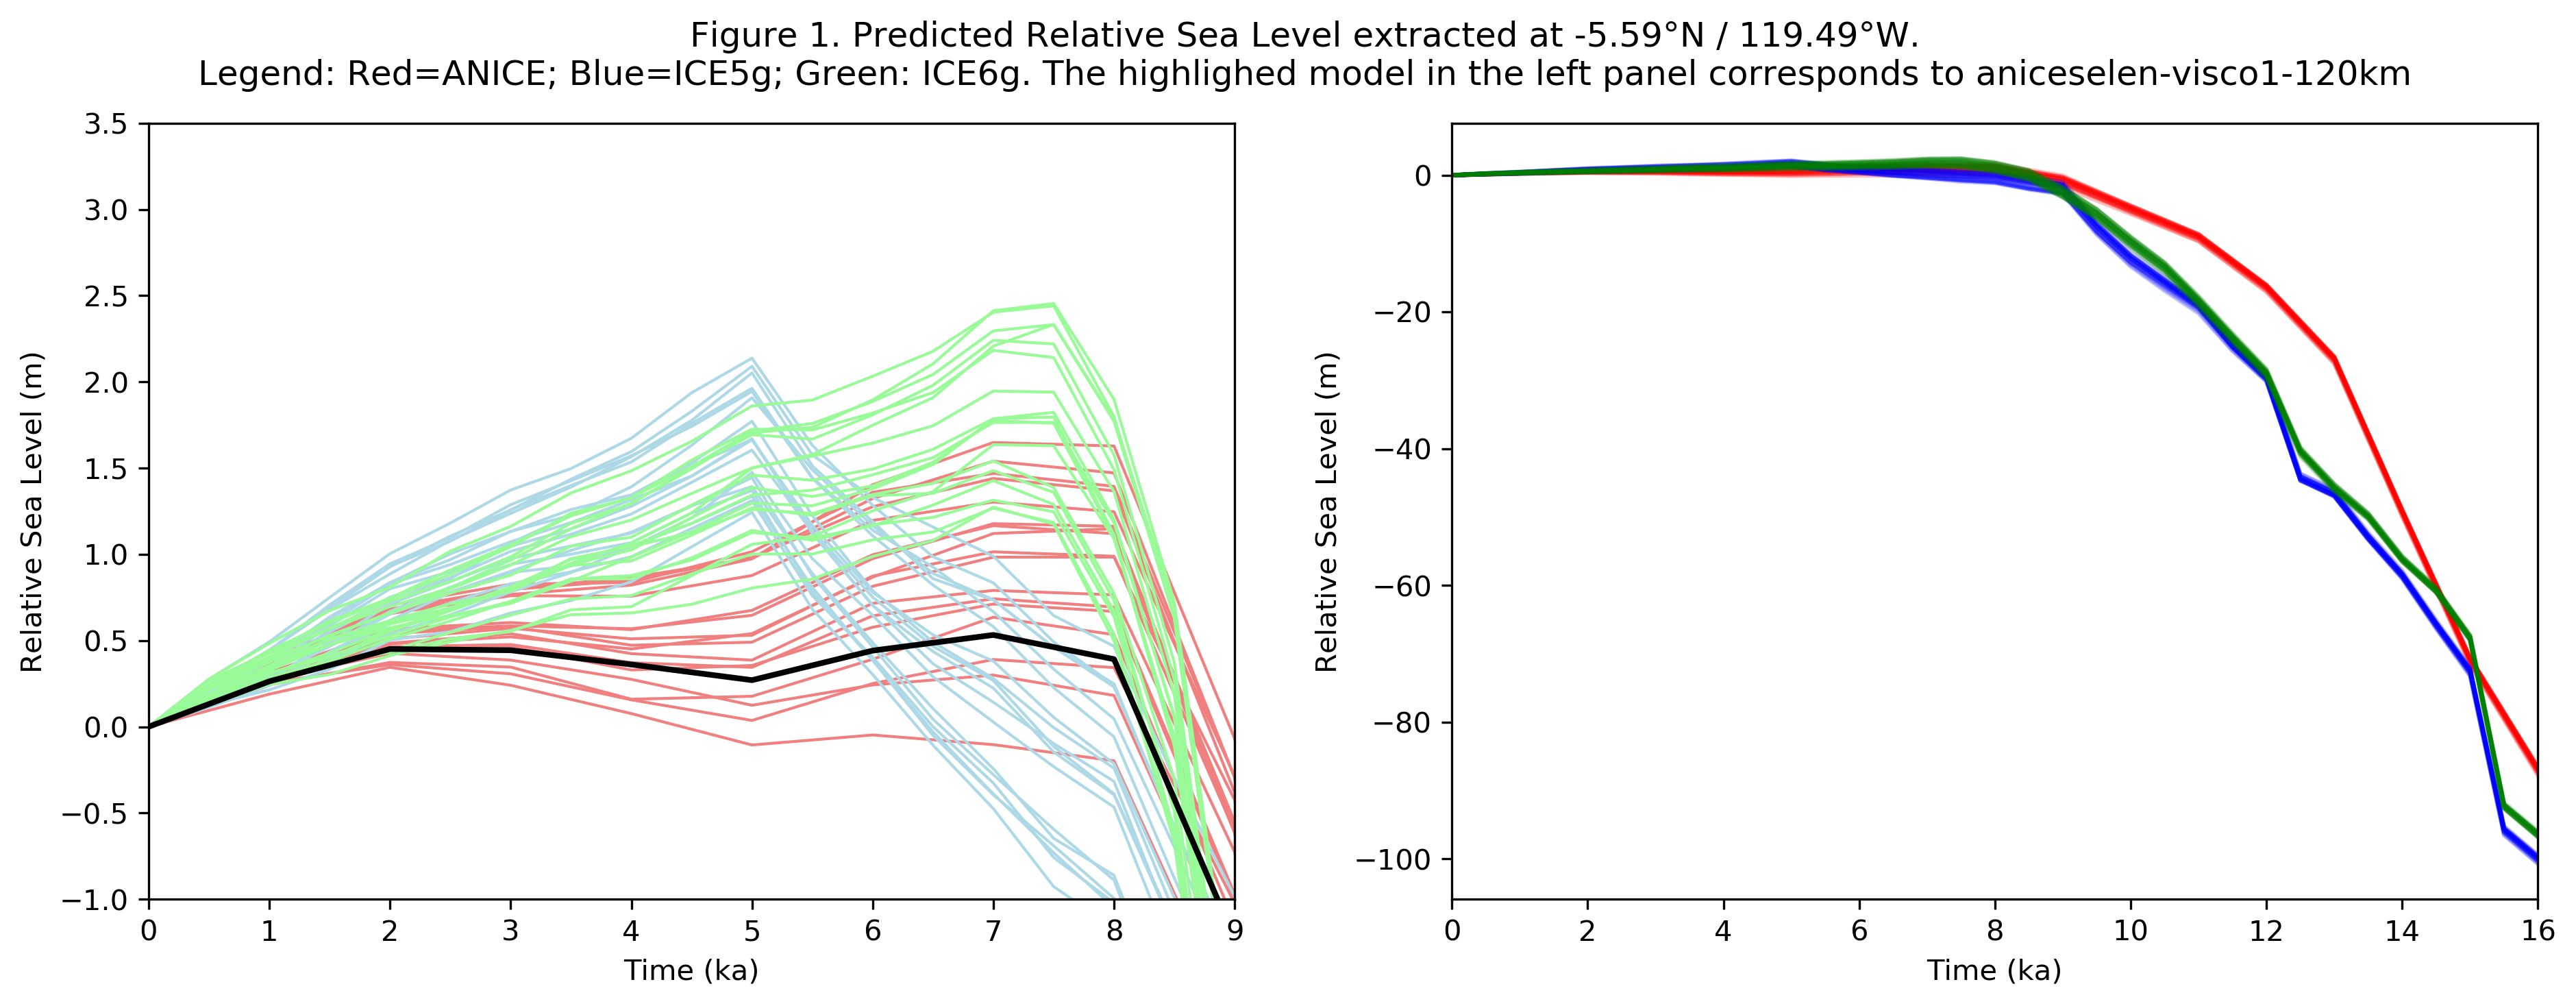

In [9]:
#Take the value from the dropdown list
GIAhighlight=Dropdown.value
GIAhighlight=GIAhighlight.replace(".nc", "")

#Plot the figure
from pylab import *
figure(num=None, figsize=(15, 5), dpi=300, facecolor='w', edgecolor='k')
fig = gcf()
fig.suptitle('Figure 1. Predicted Relative Sea Level extracted at {0:.2f}°N / {1:.2f}°W.\n' 
             'Legend: Red=ANICE; Blue=ICE5g; Green: ICE6g. The highlighed model in the left panel corresponds to {2:}'
             .format(lati,loni,str(GIAhighlight)))


#Left plot
plt.subplot(1, 2, 1)
ax = plt.gca()
AniceGIA.plot(kind='line',x='Time (ka)',color='lightcoral',ax=ax,lw=1,zorder=0)
Ice5GGIA.plot(kind='line',x='Time (ka)',color='lightblue',ax=ax,lw=1,zorder=0)
Ice6GGIA.plot(kind='line',x='Time (ka)',color='palegreen',ax=ax,lw=1,zorder=0)
#Highlight the selected model
if "aniceselen" in GIAhighlight:
  AniceGIA.plot(kind='line',x='Time (ka)',y=GIAhighlight,color='k',ax=ax,lw=2)
elif "ice5g" in GIAhighlight:
 Ice5GGIA.plot(kind='line',x='Time (ka)',y=GIAhighlight,color='k',ax=ax,lw=2)
else:
 Ice6GGIA.plot(kind='line',x='Time (ka)',y=GIAhighlight,color='k',ax=ax,lw=2)

#Adjust axes as necessary
ax.set_xlim([0,9])
ax.set_ylim([-1,3.5])
ax.get_legend().remove()

#Right plot
plt.ylabel("Relative Sea Level (m)", fontdict=None, labelpad=None)
plt.subplot(1, 2, 2)
ax = plt.gca()
AniceGIA.plot(kind='line',x='Time (ka)',color='red',alpha=0.25,ax=ax)
Ice5GGIA.plot(kind='line',x='Time (ka)',color='blue',alpha=0.25,ax=ax)
Ice6GGIA.plot(kind='line',x='Time (ka)',color='green',alpha=0.25,ax=ax)
ax.get_legend().remove()

plt.ylabel("Relative Sea Level (m)", fontdict=None, labelpad=None)


plt.show()


#Uncomment the following if you want to save the figure in svg format.
#plt.savefig("GIA.svg", dpi=300)

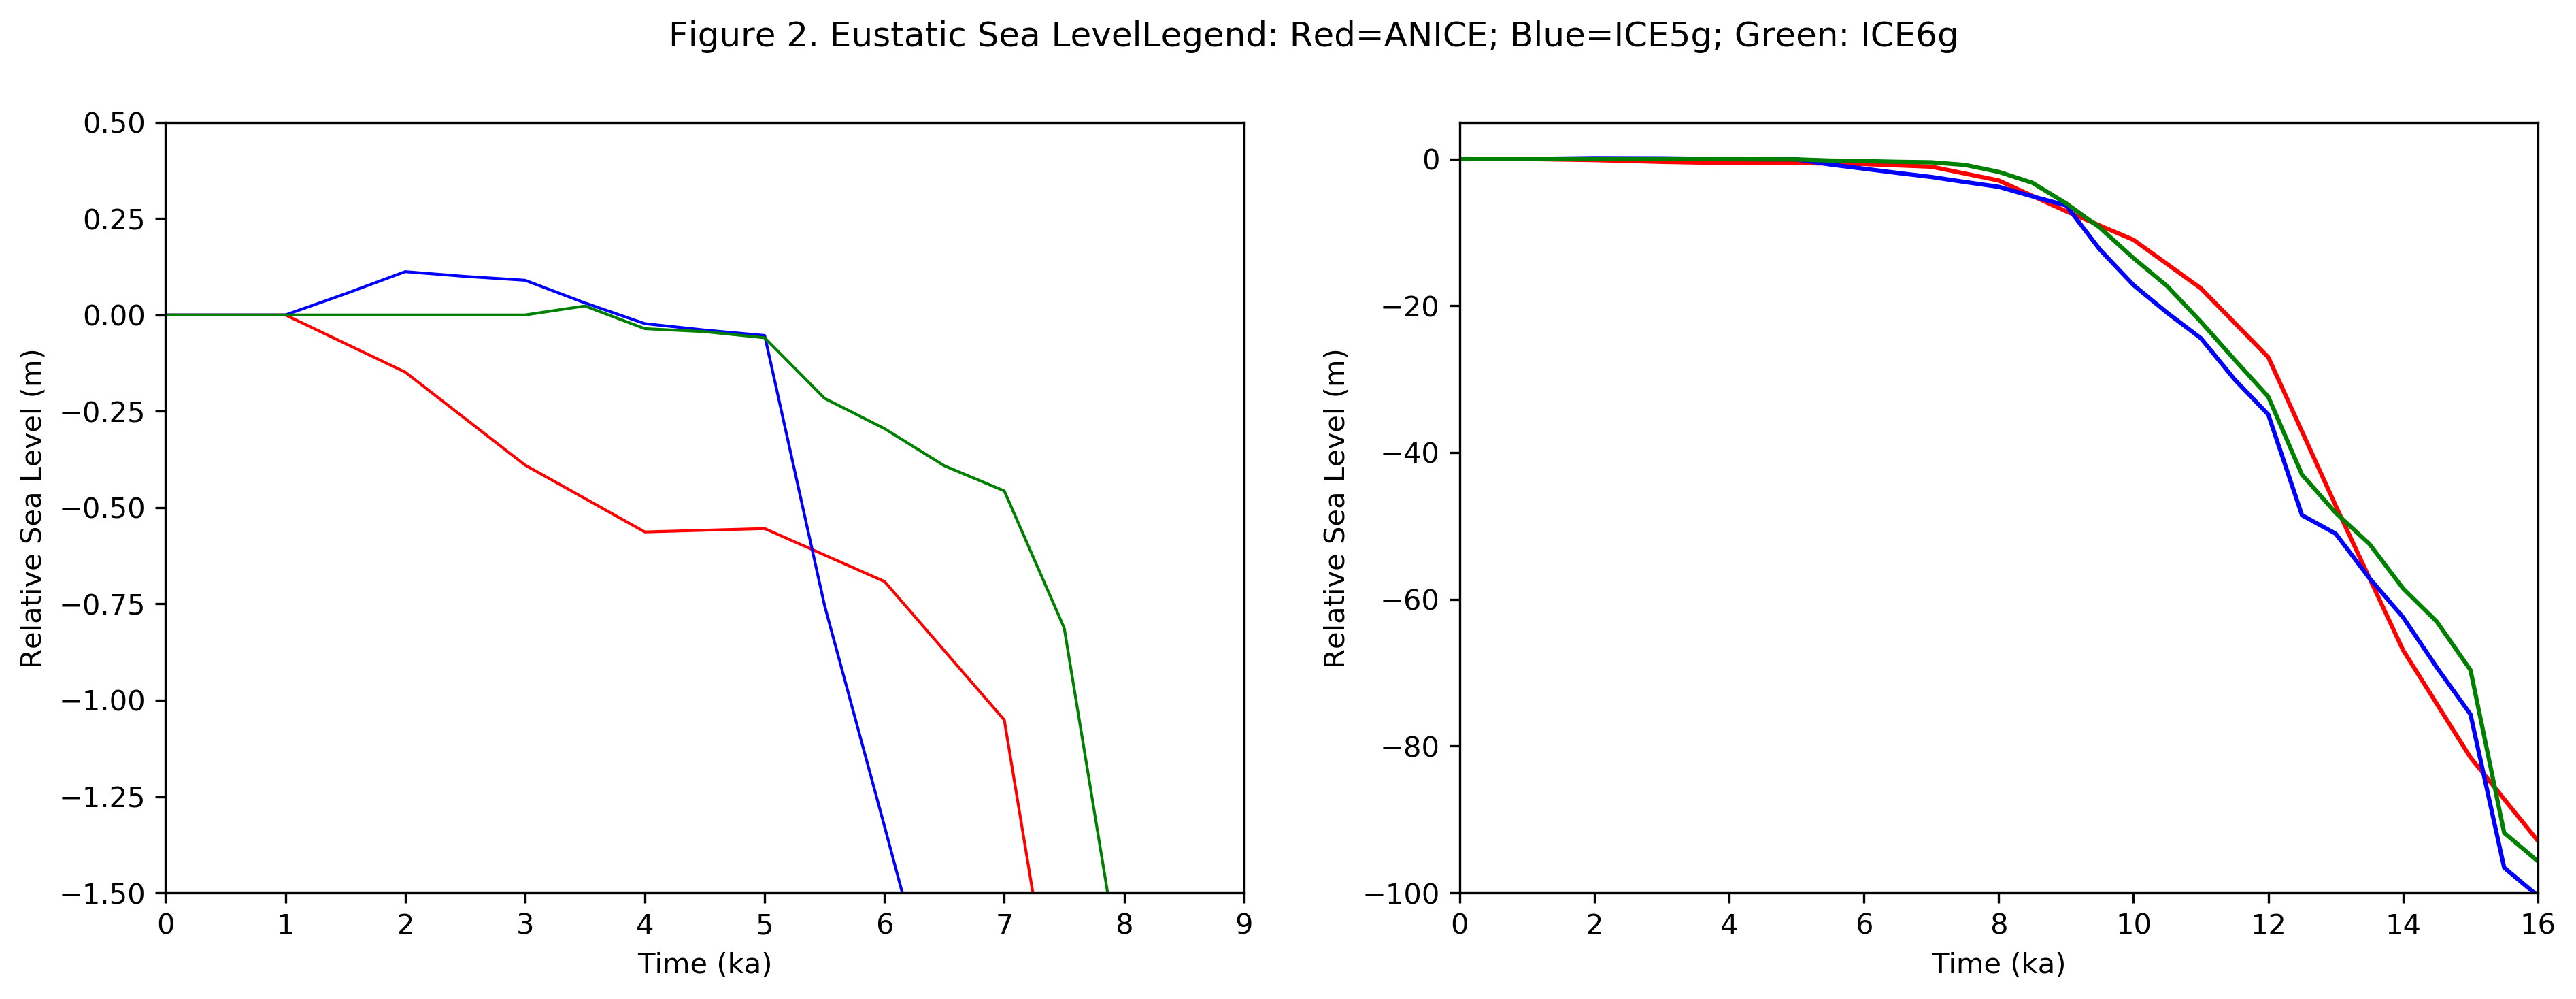

In [19]:
#####FINALIZE THIS

#import eustatic sea level
AniceESL=pd.read_csv('All_GIA_models\eustatic\eus-aniceselen.txt',delim_whitespace=True, header=None)
AniceESL.columns = ['Time (ka)', 'ESL(m)']
Ice5gESL=pd.read_csv('All_GIA_models\eustatic\eus-ice5g.txt',delim_whitespace=True, header=None)
Ice5gESL.columns = ['Time (ka)', 'ESL[m]']
Ice6gESL=pd.read_csv('All_GIA_models\eustatic\eus-ice6g.txt',delim_whitespace=True, header=None)
Ice6gESL.columns = ['Time (ka)', 'ESL(m)']

#Plot the figure
from pylab import *
figure(num=None, figsize=(15, 5), dpi=300, facecolor='w', edgecolor='k')
fig = gcf()
fig.suptitle('Figure 2. Eustatic Sea Level' 
             'Legend: Red=ANICE; Blue=ICE5g; Green: ICE6g')

#Left plot
plt.subplot(1, 2, 1)
ax = plt.gca()
AniceESL.plot(kind='line',x='Time (ka)',color='red',ax=ax,lw=1,zorder=0)
Ice5gESL.plot(kind='line',x='Time (ka)',color='blue',ax=ax,lw=1,zorder=0)
Ice6gESL.plot(kind='line',x='Time (ka)',color='green',ax=ax,lw=1,zorder=0)

#Adjust axes as necessary
ax.set_xlim([0,9])
ax.set_ylim([-1.5,0.5])
ax.get_legend().remove()

#Right plot
plt.ylabel("Relative Sea Level (m)", fontdict=None, labelpad=None)
plt.subplot(1, 2, 2)
ax = plt.gca()
AniceESL.plot(kind='line',x='Time (ka)',color='red',ax=ax)
Ice5gESL.plot(kind='line',x='Time (ka)',color='blue',ax=ax)
Ice6gESL.plot(kind='line',x='Time (ka)',color='green',ax=ax)

#Adjust axes as necessary
ax.set_xlim([0,16])
ax.set_ylim([-100,5])
ax.get_legend().remove()

plt.ylabel("Relative Sea Level (m)", fontdict=None, labelpad=None)


plt.show()


#Uncomment the following if you want to save the figure in svg format.
#plt.savefig("GIA.svg", dpi=300)

In the panel below, the Relative Sea Level observations are taking into account a user-specified tectonic uplift (positive) or subsidence (negative) rate.

**Note**. The uplift / subsidence rate is not propagated into the error bars. 

Text(0.5, 1.0, 'Figure 3. Relative Sea Level observations compared with GIA model predictions.\n See Figure 1 for GIA legend. Tectonics = -0.28 mm/yr')

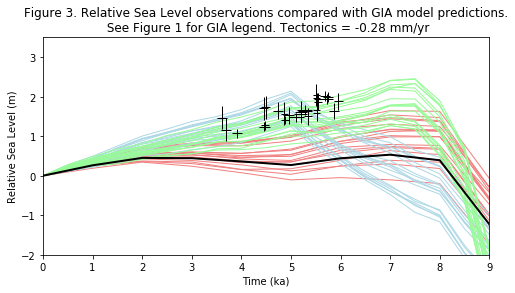

In [20]:
#Change the value below to show different uplift or subsidence rates.
RSLdata['rate_avg']=-0.28

#Calculates tectonically corrected sea level observations.
RSLdata['Corr RSL [m]']=RSLdata['RSL [m]']-(RSLdata['rate_avg']*(RSLdata['Mean age [cal a BP]']/1000))

figure(num=None, figsize=(8, 4), facecolor='w', edgecolor='k')
ax = plt.gca()

if (RSLdata['rate_avg'].iloc[0])==0:
 plt.errorbar(RSLdata['Mean age [cal a BP]']/1000,RSLdata['RSL [m]'], yerr=RSLdata['Vertical error ± [m]'], 
              xerr=RSLdata['Error (yr)']/1000, linestyle='None', ecolor='black',lw=1,zorder=40)
 plt.ylabel("Relative Sea Level (m)", fontdict=None, labelpad=None)
else:
 plt.errorbar(RSLdata['Mean age [cal a BP]']/1000,RSLdata['Corr RSL [m]'], yerr=RSLdata['Vertical error ± [m]'], 
              xerr=RSLdata['Error (yr)']/1000, linestyle='None', ecolor='black',lw=1,zorder=40)
 plt.ylabel("Relative Sea Level (m)", fontdict=None, labelpad=None)

    
AniceGIA.plot(kind='line',x='Time (ka)',color='lightcoral',ax=ax,lw=1,zorder=0)
Ice5GGIA.plot(kind='line',x='Time (ka)',color='lightblue',ax=ax,lw=1,zorder=0)
Ice6GGIA.plot(kind='line',x='Time (ka)',color='palegreen',ax=ax,lw=1,zorder=0)

#Highlight the selected model
if "aniceselen" in GIAhighlight:
  AniceGIA.plot(kind='line',x='Time (ka)',y=GIAhighlight,color='k',ax=ax,lw=2)
elif "ice5g" in GIAhighlight:
 Ice5GGIA.plot(kind='line',x='Time (ka)',y=GIAhighlight,color='k',ax=ax,lw=2)
else:
 Ice6GGIA.plot(kind='line',x='Time (ka)',y=GIAhighlight,color='k',ax=ax,lw=2)

#Adjust axes as necessary
ax.set_xlim([0,9])
ax.set_ylim([-2,3.5])
ax.get_legend().remove()

plt.title('Figure 3. Relative Sea Level observations compared with GIA model predictions.'
          '\n See Figure 1 for GIA legend. Tectonics = {:3.2f} mm/yr'.format(RSLdata['rate_avg'].iloc[0]))


#Uncomment the following if you want to save the figure in svg format.
#plt.savefig("RSL_obs.svg",dpi=700)

**Main code help from:**<br>
https://nbviewer.jupyter.org/gist/rsignell-usgs/4113653<br>
https://stackoverflow.com/questions/10377998/how-can-i-iterate-over-files-in-a-given-directory<br>
https://www.aosc.umd.edu/~cmartin/python/examples/netcdf_example1.html<br>
https://medium.com/@jdchipox/how-to-interact-with-jupyter-33a98686f24e<br>

**Reference**<br>
This script is part of the Supplementary material of Bender et al., Climate of the Past, Under rev.

**Acknowledgments**<br>
This work was supported through grant SEASCHANGE (RO-5245/1-1) from the Deutsche Forschungsgemeinschaft (DFG) as part of the Special Priority Program (SPP)-1889 “Regional Sea Level Change and Society”